In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.integrate 
import scipy.special
from sklearn import preprocessing

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [298]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

# Import Data

In [3]:
df = pd.read_csv("Data_Final")

In [4]:
df.to_csv ('Yahoo_Data.csv', index=None)

In [5]:
positive = pd.read_csv('positive-words.txt',header = None)

In [6]:
negative = pd.read_csv('negative-words.txt',header = None)

In [7]:
df = df.iloc[:,1:]

In [64]:
df.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [9]:
df['Review']

0        Great burgers,fries and salad!  Burgers have a...
1        We were a bit weary about trying the Shellfish...
2        This was a tough one!   On the merits of the w...
3        I love trying fresh seafood on piers, wharfs a...
4        I stopped in because I was hungry for some sna...
                               ...                        
53840    So let me begin by stating that the owner of N...
53841    We've used Jerry The Plumber for water heater ...
53842    Wow, talk about some of the best deals I've ev...
53843    My Husband and I decided to stop into Hook and...
53844    We have asked Burgundy Blue to capture over 5 ...
Name: Review, Length: 53845, dtype: object

In [10]:
df['Users_Ave_Star']

0        4.20
1        4.12
2        4.05
3        3.99
4        3.79
         ... 
53840    3.41
53841    4.74
53842    4.74
53843    4.36
53844    3.94
Name: Users_Ave_Star, Length: 53845, dtype: float64

## How to deal with imbalanced data
https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

1. change evaluation matrices? Sometimes, for imbalanced dataset, F1 might be a better evaluation
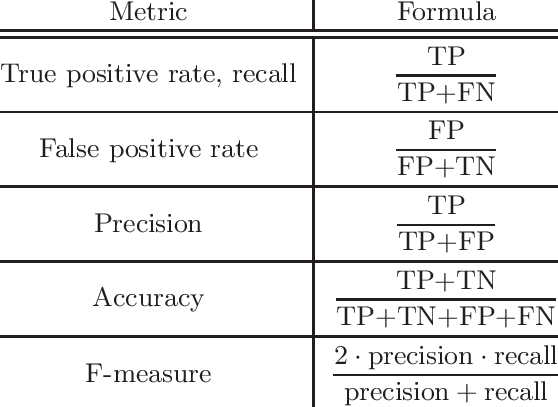
2. Under sampling : since this dataset is large, we can balanced the dataset by giving balanced data for every class
    - Over sampling: SMOTE (using knn to make synthetic data)
3. cross validation can be applied after under sampling but cross validation should be applied before over sampling
4. 有个package叫balancedbagging classifier 和balanced random forest classifier可以比较这两个的结果和
    - The sampling_strategy decides the type of resampling required (e.g. ‘majority’ – resample only the majority class, ‘all’ – resample all classes, etc) and replacement decides whether it is going to be a sample with replacement or not. https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedBaggingClassifier.html
5. **change the threshold** - For imbalanced class problems, this default threshold may not work properly. We need to change the threshold to the optimum value so that it can efficiently separate two classes. We can use ROC Curves and Precision-Recall Curves to find the optimal threshold for the classifier. We can also use a grid search method or search within a set of values to identify the optimal value. https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
6. Again, if you are using scikit-learn and logistic regression, there's a parameter called class-weight. Set this to balanced.

In [17]:
print("class rate 1:", sum(df['Star'] == 1)/len(df['Star']))
print("class rate 2:", sum(df['Star'] == 2)/len(df['Star']))
print("class rate 3:", sum(df['Star'] == 3)/len(df['Star']))
print("class rate 4:", sum(df['Star'] == 4)/len(df['Star']))
print("class rate 5:", sum(df['Star'] == 5)/len(df['Star']))

class rate 1: 0.03523075494474882
class rate 2: 0.06425851982542483
class rate 3: 0.15683907512303835
class rate 4: 0.346457424087659
class rate 5: 0.397214226019129


In [18]:
df['Star'].value_counts()

5.0    21388
4.0    18655
3.0     8445
2.0     3460
1.0     1897
Name: Star, dtype: int64

## Assign X and Y

In [29]:
X = df.drop(['Star','Elite','Bus_id','User_id','State','City'],axis = 1)

In [65]:
X.head()

,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star
0,0,0,0,"Great burgers,fries and salad! Burgers have a...",4.0,922,1687,694,1070,51,4.20
1,0,0,0,We were a bit weary about trying the Shellfish...,4.0,338,800,144,353,30,4.12
2,5,0,0,This was a tough one! On the merits of the w...,4.0,431,2126,1245,1476,76,4.05
3,2,1,0,"I love trying fresh seafood on piers, wharfs a...",4.0,258,452,125,183,37,3.99
4,1,2,0,I stopped in because I was hungry for some sna...,3.0,1638,2658,933,2297,105,3.79


In [31]:
Y = df['Star']

In [32]:
Y

0        5.0
1        5.0
2        3.0
3        5.0
4        4.0
        ... 
53840    3.0
53841    5.0
53842    5.0
53843    5.0
53844    5.0
Name: Star, Length: 53845, dtype: float64

## Train Test Split

In [107]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2)

In [108]:
print("1", sum(Y_train==1)/len(Y_train))
print("2", sum(Y_train==2)/len(Y_train))
print("3", sum(Y_train==3)/len(Y_train))
print("4", sum(Y_train==4)/len(Y_train))
print("5", sum(Y_train==5)/len(Y_train))

1 0.035240040858018386
2 0.06425851982542483
3 0.15683907512303835
4 0.346457424087659
5 0.39720494010585944


## Data Cleaning

### Drop na

In [109]:
X_train = X_train.dropna()

In [110]:
X_test = X_test.dropna()

In [111]:
Y_train = Y_train.dropna()
Y_test = Y_test.dropna()

In [112]:
len(X_train) == len(Y_train),len(X_test) == len(Y_test)

(True, True)

### Finding a list for Sentiment analysis

since the general stop-words = "English", removes meaningful words like "not", removing negative meaning stop-words like "not", "shouldn't", "won't", etc affects the performance greatly. Thus,we need to find a different list of stop words for this project

https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

We picked nltk stop words between few different libraries as it removes the least amount of words (we try to perserve more information), and modified it a little bit. We removed sentiment words like "not","no“,"cannot" from stop-words list


In [129]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')

In [130]:
remove = ['not','no','nor','most','very',"don't","aren't","couldn","couldn't",'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
for r in remove:
    sw_nltk.remove(r)

In [131]:
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can', 'will

### Tokenization

In [116]:
from gensim.utils import simple_preprocess
X_train['Review']=[simple_preprocess(line, deacc=True) for line in X_train['Review']]

In [117]:
X_train['Review'].head()

51443    [zooker, is, easily, one, of, the, best, resta...
36262    [brought, ali, in, for, little, pre, mother, d...
38558    [love, the, gluten, free, fares, here, it, typ...
16148    [wasn, my, best, experience, here, with, the, ...
52061    [bottom, line, surprisingly, good, takeout, us...
Name: Review, dtype: object

### Remove stop-words

In [132]:
for i in (X_train['Review'].index.to_list()):
    X_train['Review'][i] = [word for word in X_train['Review'][i] if word.lower() not in sw_nltk]

/var/folders/z0/kv1zx48j29n_7rvhky2s948m0000gn/T/ipykernel_17559/2000847710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Review'][i] = [word for word in X_train['Review'][i] if word.lower() not in sw_nltk]


In [133]:
X_train['Review'].head()

51443    [zooker, easily, one, best, restaurants, dinne...
36262    [brought, ali, little, pre, mother, day, celeb...
38558    [love, gluten, free, fares, typical, sandwich,...
16148    [wasn, best, experience, cashier, may, day, gr...
52061    [bottom, line, surprisingly, good, takeout, us...
Name: Review, dtype: object

### Stemming
Stemming process reduces the words to its’ root word. Unlike Lemmatization which uses grammar rules and dictionary for mapping words to root form, stemming simply removes suffixes/prefixes. Stemming is widely used in the application of SEOs, Web search results, and information retrieval since as long as the root matches in the text somewhere it helps to retrieve all the related documents in the search.

Among different methods for stemming, we pick Porter Stemmer as it is simpler and faster

In [134]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()

X_train['Review'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in X_train['Review'] ]
X_train['Review'].head()

51443    [zooker, easili, on, best, restaur, dinner, ca...
36262    [brought, ali, littl, pre, mother, dai, celebr...
38558    [love, gluten, free, fare, typic, sandwich, sa...
16148    [wasn, best, experi, cashier, mai, dai, grew, ...
52061    [bottom, line, surprisingli, good, takeout, us...
Name: Review, dtype: object

### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 

For instance, lemmatization will change "best" to "good"... However, it does loose some information for sentiment analysis. Therefore, in this case, we choose to not use lemmatization but use stemming

### TF-IDF

The whole idea is to weigh down the frequent terms while scaling up the rare ones. (helpful for search engines but maybe not in this case?)

A high weight in tf–idf is reached by a high term frequency (in the given document) and a low document frequency of the term in the whole collection of documents; the weights hence tend to filter out common terms. 
所以我们可以用TF-IDF来filter出一些常见的词汇

TF-IDF gives larger values for less frequent words in the document corpus. TF-IDF value is high when both IDF and TF values are high i.e the word is rare in the whole document but frequent in a document.

TF-IDF also doesn’t take the semantic meaning of the words.

TF = number of times the term appears in the doc/total number of words in the doc

IDF = ln(number of docs/number docs the term appears in)

In [146]:
for i in (X_train['Review'].index.to_list()):
    X_train['Review'][i] = " ".join(X_train['Review'][i])
    
X_train['Review'].head()

/var/folders/z0/kv1zx48j29n_7rvhky2s948m0000gn/T/ipykernel_17559/2330392899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Review'][i] = " ".join(X_train['Review'][i])


51443    zooker easili on best restaur dinner carpinter...
36262    brought ali littl pre mother dai celebr wonder...
38558    love gluten free fare typic sandwich salad lun...
16148    wasn best experi cashier mai dai grew eat rust...
52061    bottom line surprisingli good takeout usual ge...
Name: Review, dtype: object

In [147]:
# use tfidf by removing tokens that don't appear in at least 10 reviews
vect = TfidfVectorizer(min_df=10, stop_words=None) #look into TfidfVectorizer

# Fit and transform
X_Review = vect.fit_transform(X_train['Review']) #transforms the document headlines

In [152]:
X_Review_df = pd.DataFrame(X_Review.toarray(), columns = vect.get_feature_names())
X_Review_df

,aaa,aaron,ab,aback,abalon,abandon,abc,abil,abl,aboard,...,zip,zippi,zizzo,zodo,zombi,zone,zoo,zooker,zoom,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.610282,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.102854,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
43072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
43073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
43074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


highlight一些 tf_idf表示sentiment的词语，然后sum他们的和，最后选取sum出来 值>150的词语作为bag of words的dictionary

In [175]:
positive = pd.read_csv('positive-words.txt',header = None)
negative = pd.read_csv('negative-words.txt',header = None)
positive.columns = ["positive"]
pos_list = list(positive['positive'])
negative.columns = ["negative"]
neg_list = list(negative['negative'])

In [190]:
sen_dic = []
sen_dic = list((set(neg_list).union(set(pos_list))).intersection(set(vect.get_feature_names())))

In [193]:
X_Review_df[sen_dic] = X_Review_df[sen_dic]*10

In [199]:
sum_val = X_Review_df.apply(sum,axis = 0)

In [203]:
bow_dic = X_Review_df.columns[sum_val >= 150].to_list()

### Bag of Words
The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.

BOW doesn’t work very well when there are small changes in the terminology we are using as here we have sentences with similar meaning but with just different words. -- thus inroduce lemmatization

Sparse vectors require more memory and computational resources when modeling and the vast number of positions or dimensions can make the modeling process very challenging for traditional algorithms.As such, there is pressure to decrease the size of the vocabulary when using a bag-of-words model. -- Thus introduce NMF to do dimensionality reduction and NMF >PCA and SVM because **the non-negativity constraint extract the useful information from the result and better for interpretation**

In [204]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
CountVec = CountVectorizer(ngram_range=(1,1), max_df = 21538, min_df = 10)# to use bigrams ngram_range=(2,2) # max_feature can only control the most common top words

In [206]:
count_matrix = CountVec.fit_transform(X_train['Review'])
count_array = count_matrix.toarray()
BOW_df = pd.DataFrame(data=count_array,columns = CountVec.get_feature_names())

In [208]:
BOW_df.head()

,aaa,aaron,ab,aback,abalon,abandon,abc,abil,abl,aboard,...,zip,zippi,zizzo,zodo,zombi,zone,zoo,zooker,zoom,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
bow_dic = list(set(bow_dic).intersection(set(BOW_df.columns)))
BOW_df = BOW_df[bow_dic]
BOW_df.head()

,pai,skeptic,season,visit,wish,chip,glass,felt,blame,santa,...,sit,calm,tip,glad,rude,loud,attent,bowl,smooth,afford
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying NMF

In [213]:
model = NMF(n_components=30, random_state=5)
 
# Fit the model to TF-IDF
model.fit(BOW_df.values)

# Transform the TF-IDF: nmf_features
nmf_features = model.transform(BOW_df.values)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [215]:
H_df = pd.DataFrame(model.components_, columns=BOW_df.columns)
H_df.head()

,pai,skeptic,season,visit,wish,chip,glass,felt,blame,santa,...,sit,calm,tip,glad,rude,loud,attent,bowl,smooth,afford
0,0.058844,0.000000,0.000000,0.032697,0.062560,0.158902,0.017883,0.000000,0.000000,0.000000,...,0.414962,0.000000,0.000000,0.041801,0.00000,0.000000,0.0,0.255412,0.000000,0.000000
1,0.207789,0.001778,0.093270,0.000000,0.045347,0.000000,0.000000,0.122089,0.004439,0.000000,...,0.022215,0.000000,0.000000,0.000000,0.00542,0.193352,0.0,0.000000,0.007959,0.051914
2,0.000000,0.000000,0.020187,1.326008,0.000000,0.000000,0.000000,0.000000,0.000000,11.669761,...,0.013318,0.014987,0.130587,0.081856,0.00000,0.000000,0.0,0.043418,0.013368,0.046344
3,0.000000,0.006768,0.000000,0.000000,0.018021,0.161143,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000630
4,0.005719,0.008678,0.000000,0.161627,0.005492,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.084804,0.000000,0.000000,0.065929,0.00000,0.038429,0.0,0.000000,0.000000,0.030933


In [218]:
W_df = pd.DataFrame(nmf_features)
W_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.044111,0.059445,0.000201,0.000000,0.000000,0.000000,0.000000,0.000000,0.112249,0.075297,...,0.011410,0.026082,0.000000,0.000000,0.083025,0.000000,0.001178,0.000000,0.000000,0.093754
1,0.000142,0.000000,0.005221,0.000000,0.000000,0.049649,0.000000,0.339391,0.068233,0.069490,...,0.002471,0.093764,0.000000,0.000000,0.000000,0.007990,0.013444,0.006547,0.010223,0.018575
2,0.093054,0.010168,0.000000,0.000000,0.217554,0.000000,0.097157,0.000000,0.000014,0.000000,...,0.004335,0.155102,0.000000,0.044162,0.023040,0.003346,0.078936,0.016957,0.000000,0.000000
3,0.006596,0.000000,0.003925,0.005964,0.002048,0.000513,0.000000,0.000000,0.002836,0.002111,...,0.000104,0.013300,0.024265,0.054408,0.000633,0.007317,0.000000,0.000000,0.000000,0.037422
4,0.000000,0.000000,0.000000,0.124671,0.284318,0.093415,0.047149,0.000000,0.000000,0.000000,...,0.000509,0.000000,0.000000,0.015732,0.003530,0.002466,0.015809,0.128808,0.063356,0.002290


In [219]:
for topic in range(H_df.shape[0]):
    tmp = H_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
order    20.372437
wait      1.912312
tabl      1.730525
came      1.491206
pizza     1.194481
minut     0.931698
didn      0.846033
take      0.827482
ask       0.815109
seat      0.750858
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
room         10.124323
hotel         4.648966
stai          3.700507
night         2.392895
clean         1.167028
check         1.126576
locat         1.011535
front         0.979045
breakfast     0.945575
staff         0.832416
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
santa      11.669761
barbara    11.088971
visit       1.326008
restaur     0.851680
best        0.751472
locat       0.698843
dai         0.665427
local       0.661978
beauti      0.644172
stop        0.639618
Name: 2, dtype: float64


For topic 4 the words with the highest value are:
good      15.365398
pretti     1.457436
price      0.489943
got        0.414977
pizza      0

In [225]:
# Change column names of W_matrix
W_col = []
for i in range(1,31):
    W_col.append('Topic ' + str(i))
W_df.columns = W_col
W_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30
0,0.044111,0.059445,0.000201,0.000000,0.000000,0.000000,0.000000,0.000000,0.112249,0.075297,...,0.011410,0.026082,0.000000,0.000000,0.083025,0.000000,0.001178,0.000000,0.000000,0.093754
1,0.000142,0.000000,0.005221,0.000000,0.000000,0.049649,0.000000,0.339391,0.068233,0.069490,...,0.002471,0.093764,0.000000,0.000000,0.000000,0.007990,0.013444,0.006547,0.010223,0.018575
2,0.093054,0.010168,0.000000,0.000000,0.217554,0.000000,0.097157,0.000000,0.000014,0.000000,...,0.004335,0.155102,0.000000,0.044162,0.023040,0.003346,0.078936,0.016957,0.000000,0.000000
3,0.006596,0.000000,0.003925,0.005964,0.002048,0.000513,0.000000,0.000000,0.002836,0.002111,...,0.000104,0.013300,0.024265,0.054408,0.000633,0.007317,0.000000,0.000000,0.000000,0.037422
4,0.000000,0.000000,0.000000,0.124671,0.284318,0.093415,0.047149,0.000000,0.000000,0.000000,...,0.000509,0.000000,0.000000,0.015732,0.003530,0.002466,0.015809,0.128808,0.063356,0.002290


In [235]:
X_train.index = W_df.index
Y_train.index = W_df.index

In [236]:
X_train

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star
0,0,0,1,4.5,175,249,71,142,7,4.45
1,18,17,7,4.5,422,4156,1767,3043,304,4.18
2,0,0,0,4.5,503,835,185,416,26,4.09
3,0,0,1,3.0,175,124,63,64,5,4.54
4,2,2,2,4.5,792,1893,807,815,62,3.77
...,...,...,...,...,...,...,...,...,...,...
43071,1,1,1,4.5,1225,6791,4343,5293,314,3.97
43072,0,0,1,4.5,172,136,89,32,3,3.44
43073,3,0,0,3.5,204,244,52,116,15,4.23
43074,2,1,0,3.0,315,582,216,309,21,3.71


In [238]:
X_train_clean = pd.concat([X_train, W_df], axis=1)

In [240]:
X_train_clean.head()

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30
0,0,0,1,4.5,175,249,71,142,7,4.45,...,0.011410,0.026082,0.000000,0.000000,0.083025,0.000000,0.001178,0.000000,0.000000,0.093754
1,18,17,7,4.5,422,4156,1767,3043,304,4.18,...,0.002471,0.093764,0.000000,0.000000,0.000000,0.007990,0.013444,0.006547,0.010223,0.018575
2,0,0,0,4.5,503,835,185,416,26,4.09,...,0.004335,0.155102,0.000000,0.044162,0.023040,0.003346,0.078936,0.016957,0.000000,0.000000
3,0,0,1,3.0,175,124,63,64,5,4.54,...,0.000104,0.013300,0.024265,0.054408,0.000633,0.007317,0.000000,0.000000,0.000000,0.037422
4,2,2,2,4.5,792,1893,807,815,62,3.77,...,0.000509,0.000000,0.000000,0.015732,0.003530,0.002466,0.015809,0.128808,0.063356,0.002290


### change thredshold? How to do train test in NMF?

# Feature Extraction

### LASSO
https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

In [248]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train_clean, np.ravel(Y_train,order='C'))
X_train_LSimportant = pd.DataFrame(X_train_clean)

In [249]:
X_train_LSimportant

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30
0,0,0,1,4.5,175,249,71,142,7,4.45,...,0.011410,0.026082,0.000000,0.000000,0.083025,0.000000,0.001178,0.000000,0.000000,0.093754
1,18,17,7,4.5,422,4156,1767,3043,304,4.18,...,0.002471,0.093764,0.000000,0.000000,0.000000,0.007990,0.013444,0.006547,0.010223,0.018575
2,0,0,0,4.5,503,835,185,416,26,4.09,...,0.004335,0.155102,0.000000,0.044162,0.023040,0.003346,0.078936,0.016957,0.000000,0.000000
3,0,0,1,3.0,175,124,63,64,5,4.54,...,0.000104,0.013300,0.024265,0.054408,0.000633,0.007317,0.000000,0.000000,0.000000,0.037422
4,2,2,2,4.5,792,1893,807,815,62,3.77,...,0.000509,0.000000,0.000000,0.015732,0.003530,0.002466,0.015809,0.128808,0.063356,0.002290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43071,1,1,1,4.5,1225,6791,4343,5293,314,3.97,...,0.063291,0.081687,0.000000,0.119432,0.063898,0.000000,0.026122,0.000000,0.062307,0.008945
43072,0,0,1,4.5,172,136,89,32,3,3.44,...,0.000000,0.001837,0.004548,0.000000,0.000000,0.000000,0.000000,0.000000,0.014184,0.000000
43073,3,0,0,3.5,204,244,52,116,15,4.23,...,0.000000,0.002393,0.000000,0.001405,0.000000,0.002757,0.001077,0.000137,0.000000,0.000000
43074,2,1,0,3.0,315,582,216,309,21,3.71,...,0.000586,0.000000,0.000000,0.054204,0.009036,0.004667,0.006342,0.000000,0.000000,0.010405


In [250]:
selected_feat = X_train_clean.columns[(sel_.get_support())]
selected_feat

Index(['Useful', 'Cool', 'Funny', 'Bus_Ave_Star', 'User_Review_count',
       'User_Useful_count', 'User_Funny_count', 'User_Cool_count', 'User_Fans',
       'Users_Ave_Star', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5',
       'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11',
       'Topic 12', 'Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17',
       'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23',
       'Topic 24', 'Topic 25', 'Topic 26', 'Topic 27', 'Topic 28', 'Topic 29',
       'Topic 30'],
      dtype='object')

In [257]:
print('total features: {}'.format((X_train_clean.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 40
selected features: 40
features with coefficients shrank to zero: 9


In [383]:
sel_.estimator_.coef_ == 0

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [False, False, False, False, F

In [384]:
sel_.estimator_.coef_

array([[ 1.60158705e-01, -4.47978847e-01,  2.72723395e-01,
        -9.63453165e-01, -1.04205728e-03,  7.95780577e-05,
        -2.06102357e-04,  9.73861492e-05, -4.70209365e-04,
        -1.09311846e+00,  2.78244184e+00, -4.58984664e-01,
        -2.73855029e+00, -7.52797554e+00,  1.81614340e+00,
         1.29292816e-01,  5.58923405e+00,  7.65098089e-01,
         0.00000000e+00, -1.18094731e+01,  1.79055016e+00,
        -2.63206540e+00,  0.00000000e+00, -2.56907339e+00,
        -1.46054525e+00,  4.28944200e+00,  4.67800616e-01,
        -1.62626334e+00, -8.61351194e+00, -3.08688547e+00,
         1.76379207e+00, -1.38972767e+01, -1.21781985e+00,
        -2.25543603e+00,  0.00000000e+00,  1.07874399e+01,
        -4.67601902e+00,  6.83893981e-02, -7.72300825e+00,
        -5.91758720e+00],
       [ 8.44828329e-02, -2.53477369e-01,  1.59044983e-01,
        -7.14235246e-01, -1.24422970e-04,  2.96564821e-05,
        -8.92658084e-05,  4.72320103e-05,  2.16172490e-04,
        -1.16331747e+00,  2.60

In [336]:
ave_estimators = (sel_.estimator_.coef_[0] + sel_.estimator_.coef_[1] + sel_.estimator_.coef_[2] +sel_.estimator_.coef_[3]+sel_.estimator_.coef_[4])/5 

In [337]:
ave_estimators

array([ 2.29822210e-02, -1.10749818e-01,  7.68124004e-02, -2.31897541e-01,
       -2.18679611e-04,  3.09108077e-05, -4.57285873e-05,  9.00769273e-06,
       -2.21697656e-05, -3.69575522e-01,  7.70211833e-01, -7.19763989e-02,
       -1.03729102e+00, -1.51404713e+00,  3.22580552e-01,  3.42155235e-01,
        1.54522864e+00,  2.46321329e-01, -1.99955505e-01, -3.71476051e+00,
        8.81828524e-01, -5.05398785e-01, -3.49893818e-02, -3.72886945e-01,
       -2.66015346e-01,  5.46022575e-01, -1.06790950e-01, -4.86652428e-01,
       -1.93313610e+00, -1.77365372e-01,  2.41694985e-01, -5.19505374e+00,
       -1.76357421e-01, -2.73221465e-01,  2.08569931e-01,  9.28545758e-01,
       -9.38258376e-01, -7.52127996e-02, -1.79712031e+00, -1.23874195e+00])

In [342]:
LS_importance = pd.DataFrame(ave_estimators)
LS_importance.index = X_train_clean.columns
LS_importance.columns =  ["Importance"]
LS_importance['Importance abs'] = abs(ave_estimators)
LS_importance = LS_importance.sort_values(by=['Importance abs'],ascending = False)

In [343]:
LS_importance

,Importance,Importance abs
Topic 22,-5.195054,5.195054
Topic 10,-3.714761,3.714761
Topic 19,-1.933136,1.933136
Topic 29,-1.797120,1.797120
Topic 7,1.545229,1.545229
Topic 4,-1.514047,1.514047
Topic 30,-1.238742,1.238742
Topic 3,-1.037291,1.037291
Topic 27,-0.938258,0.938258
Topic 26,0.928546,0.928546


<Figure size 14400x21600 with 0 Axes>

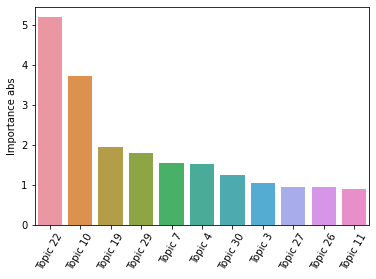

<Figure size 14400x21600 with 0 Axes>

In [344]:
sns.barplot(x = LS_importance[LS_importance['Importance abs'] >= 0.8].index ,y=LS_importance[LS_importance['Importance abs'] >= 0.8]['Importance abs'
])
plt.xticks(rotation = 60)
plt.figure(figsize = (200,300))

In [286]:
X_train_LSimportant = X_train_clean[X_train_clean.columns[abs(ave_estimators) >= 0.001]]

In [287]:
X_train_LSimportant.columns

Index(['Useful', 'Cool', 'Funny', 'Bus_Ave_Star', 'Users_Ave_Star', 'Topic 1',
       'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
       'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13',
       'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19',
       'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24', 'Topic 25',
       'Topic 26', 'Topic 27', 'Topic 28', 'Topic 29', 'Topic 30'],
      dtype='object')

The thredshold set for Lasso is 1e-3

### RF - feature_importance

In [385]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [386]:
rf = RandomForestRegressor(n_estimators=200)

In [387]:
rf.fit(X_train_clean, Y_train)

RandomForestRegressor(n_estimators=200)

In [388]:
rf.feature_importances_

array([0.01026683, 0.00923075, 0.0074099 , 0.10513561, 0.02266489,
       0.0133916 , 0.0138019 , 0.0140216 , 0.01525214, 0.08571737,
       0.01587276, 0.01146235, 0.02385323, 0.02539449, 0.01670579,
       0.02195263, 0.07288534, 0.0101087 , 0.01413413, 0.048554  ,
       0.0194603 , 0.0152777 , 0.01075768, 0.0103132 , 0.01442202,
       0.01712413, 0.01507763, 0.0154103 , 0.01760002, 0.01540082,
       0.01493533, 0.11142196, 0.01308283, 0.01263475, 0.01711761,
       0.05745507, 0.01317053, 0.01830869, 0.01829732, 0.0149161 ])

In [390]:
RF_importance = pd.DataFrame(rf.feature_importances_)
RF_importance.index = X_train_clean.columns
RF_importance.columns =  ["Importance"]
RF_importance = RF_importance.sort_values(by=['Importance'],ascending = False)

In [391]:
RF_importance

,Importance
Topic 22,0.111422
Bus_Ave_Star,0.105136
Users_Ave_Star,0.085717
Topic 7,0.072885
Topic 26,0.057455
Topic 10,0.048554
Topic 4,0.025394
Topic 3,0.023853
User_Review_count,0.022665
Topic 6,0.021953


<Figure size 14400x21600 with 0 Axes>

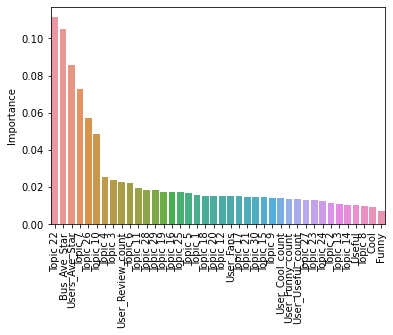

<Figure size 14400x21600 with 0 Axes>

In [392]:
sns.barplot(x = RF_importance.index ,y=RF_importance.Importance)
plt.xticks(rotation = 90)
plt.figure(figsize = (200,300))

### The most important features

<Figure size 14400x21600 with 0 Axes>

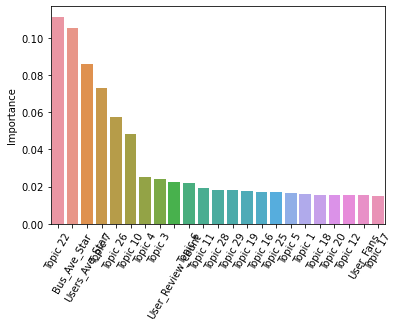

<Figure size 14400x21600 with 0 Axes>

In [411]:
sns.barplot(x = RF_importance[RF_importance['Importance'] >= 0.015].index ,y=RF_importance[RF_importance['Importance'] >= 0.015].Importance)
plt.xticks(rotation = 60)
plt.figure(figsize = (200,300))

### EDA for certain variables
+

For feature selection, we got different results for LASSO and random forest. The way they select the importance is different. 
1. The most important features should be rated high in both method, thus we set a thredshold for both.
2. hyperparameter的值可能会对feature importance有点影响，但是我觉得影响应该不大。因为RF是随机挑选的feature去构造树。只要树够多，基本上都会考虑到所有的feature


所以我们准备重新run一下random forest feature selection using more trees, 并且用另外一种方式 - average mean decrease 比较结果

step:  
   1. rerun the above code with more estimators
   2. rerun the random forest feature selection with more estimators and average mean decrease
   3. set up a thredshold for both LASSO and random forest selection results and selected fewer features
       - can also use LASSO first then random forest because RF is not able to differentiate correlated features
   4. briefly estimated the range of the best parameters and use random grid
   5. estimate the best parameter using gram grid
   6. ROC curve
   


**有一个争议比较大的variable: User review count. It ranked really low in LASSO but relative high in RF**

### RF importance using permutation

In [394]:
perm_importance = permutation_importance(rf, X_train_clean, Y_train)

In [403]:
perm_importance.importances_mean

array([0.0126345 , 0.01839431, 0.00941063, 0.45351623, 0.02975969,
       0.01488735, 0.01661914, 0.01691528, 0.01768908, 0.33622836,
       0.02292842, 0.01273891, 0.07775927, 0.05985955, 0.01966846,
       0.0516758 , 0.29168466, 0.01112785, 0.01785468, 0.20236992,
       0.03292944, 0.02256379, 0.0110066 , 0.01094273, 0.01673209,
       0.02275283, 0.01764243, 0.0216894 , 0.02745062, 0.0226928 ,
       0.01819616, 0.38931684, 0.0163352 , 0.01666524, 0.02115974,
       0.14906622, 0.01804566, 0.03002414, 0.03600507, 0.02108266])

In [404]:
perm_importance = pd.DataFrame(perm_importance.importances_mean)
perm_importance.index = X_train_clean.columns
perm_importance.columns =  ["Importance"]
perm_importance = perm_importance.sort_values(by=['Importance'],ascending = False)

In [408]:
perm_importance

,Importance
Bus_Ave_Star,0.453516
Topic 22,0.389317
Users_Ave_Star,0.336228
Topic 7,0.291685
Topic 10,0.202370
Topic 26,0.149066
Topic 3,0.077759
Topic 4,0.059860
Topic 6,0.051676
Topic 29,0.036005


<Figure size 14400x21600 with 0 Axes>

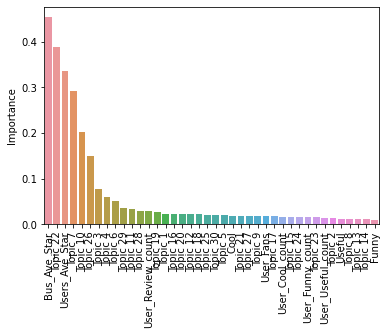

<Figure size 14400x21600 with 0 Axes>

In [405]:
sns.barplot(x = perm_importance.index ,y=perm_importance.Importance)
plt.xticks(rotation = 90)
plt.figure(figsize = (200,300))

<Figure size 14400x21600 with 0 Axes>

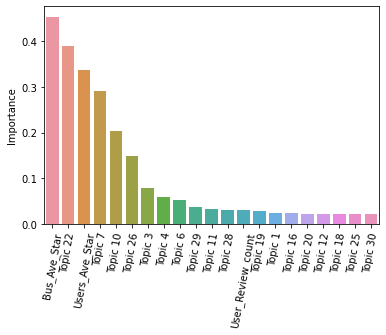

<Figure size 14400x21600 with 0 Axes>

In [410]:
sns.barplot(x = perm_importance[perm_importance['Importance'] >= 0.02].index ,y=perm_importance[perm_importance['Importance'] >= 0.02].Importance)
plt.xticks(rotation = 80)
plt.figure(figsize = (200,300))

In [413]:
rf.score(X_train_clean,Y_train)

0.9188780390960224

In [414]:
#救命....
#速速tune一些parameter...
rf.score(X_test_clean,Y_test)

0.3588350554270475

In [412]:
#LASSO selected features
X_train_LSimportant.columns

Index(['Useful', 'Cool', 'Funny', 'Bus_Ave_Star', 'Users_Ave_Star', 'Topic 1',
       'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
       'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12', 'Topic 13',
       'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19',
       'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24', 'Topic 25',
       'Topic 26', 'Topic 27', 'Topic 28', 'Topic 29', 'Topic 30'],
      dtype='object')

In [418]:
# RF_Gini_importance features
RF_gini_selected = RF_importance[RF_importance['Importance'] >= 0.015].index
RF_gini_selected

Index(['Topic 22', 'Bus_Ave_Star', 'Users_Ave_Star', 'Topic 7', 'Topic 26',
       'Topic 10', 'Topic 4', 'Topic 3', 'User_Review_count', 'Topic 6',
       'Topic 11', 'Topic 28', 'Topic 29', 'Topic 19', 'Topic 16', 'Topic 25',
       'Topic 5', 'Topic 1', 'Topic 18', 'Topic 20', 'Topic 12', 'User_Fans',
       'Topic 17'],
      dtype='object')

In [420]:
# RF_permutation_importance features
RF_per_selected = perm_importance[perm_importance['Importance'] >= 0.015].index
RF_per_selected

Index(['Bus_Ave_Star', 'Topic 22', 'Users_Ave_Star', 'Topic 7', 'Topic 10',
       'Topic 26', 'Topic 3', 'Topic 4', 'Topic 6', 'Topic 29', 'Topic 11',
       'Topic 28', 'User_Review_count', 'Topic 19', 'Topic 1', 'Topic 16',
       'Topic 20', 'Topic 12', 'Topic 18', 'Topic 25', 'Topic 30', 'Topic 5',
       'Cool', 'Topic 21', 'Topic 27', 'Topic 9', 'User_Fans', 'Topic 17',
       'User_Cool_count', 'Topic 15', 'Topic 24', 'User_Funny_count',
       'Topic 23'],
      dtype='object')

In [431]:
## 3个intersection
three_selected = list(set(RF_gini_selected).intersection(set(RF_per_selected)).intersection(set(X_train_LSimportant.columns)))

In [435]:
## tree structure model selections
tree_selected = list(set(RF_gini_selected).intersection(set(RF_per_selected)))

## linear selection
lasso_selected = list(X_train_LSimportant.columns)

# Classification

In [348]:
# Transform the Testing sets - X_test
X_test['Review']

16517    Solid dive bar.\n\nThe Sportsman is a nice esc...
25588    Kyle's Kitchen was recommended by a couple peo...
21011    So after Yelping to see where to eat as I roll...
35294    Overall, maybe a 3 1/2 star experience,  but n...
28064    Yummi....i had the breakfast burrito....large ...
                               ...                        
39703    A very small family owned market & restaurant ...
26384    I like this place mostly for the atmosphere......
2238     Shawn... thanks again! First time was awesome....
27889    I love the Goodland Kitchen! I had the Magnoli...
45461    This place is hidden, beautiful, and perfect f...
Name: Review, Length: 10769, dtype: object

In [351]:
X_test_vec = CountVec.transform(X_test['Review'])

In [352]:
X_test_vec

<10769x8491 sparse matrix of type '<class 'numpy.int64'>'
	with 396391 stored elements in Compressed Sparse Row format>

In [353]:
BOW_df_test = pd.DataFrame(data=X_test_vec.toarray(),columns = CountVec.get_feature_names())

In [354]:
BOW_df_test = BOW_df_test[bow_dic]
BOW_df_test.head()

,pai,skeptic,season,visit,wish,chip,glass,felt,blame,santa,...,sit,calm,tip,glad,rude,loud,attent,bowl,smooth,afford
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [355]:
W_df_test = model.transform(BOW_df_test)

In [359]:
W_df_test = pd.DataFrame(W_df_test)
W_df_test.columns = W_df.columns

In [361]:
W_df_test.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30
0,0.000000,0.000302,0.000000,0.000448,0.072733,0.000000,0.000000,0.003604,0.000702,0.000000,...,0.004395,0.012093,0.086381,0.007211,0.000000,0.006131,0.011928,0.000000,0.061692,0.003519
1,0.000000,0.000000,0.000000,0.132243,0.001193,0.007254,0.001523,0.000000,0.056631,0.000000,...,0.000000,0.000000,0.000000,0.036295,0.000000,0.005669,0.000000,0.000000,0.002659,0.000000
2,0.000000,0.000000,0.082814,0.000000,0.143609,0.000000,0.000000,0.000000,0.000000,0.064291,...,0.067602,0.000000,0.000000,0.002755,0.000000,0.049363,0.020916,0.000000,0.000000,0.009067
3,0.004321,0.125416,0.000000,0.005121,0.000000,0.053810,0.051437,0.000000,0.503427,0.262233,...,0.000000,0.000000,0.016155,0.003174,0.005440,0.000000,0.000000,0.150588,0.009850,0.120197
4,0.000000,0.010325,0.000000,0.064606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.036754,0.000000,0.000000,0.000000


In [362]:
X_test.index = W_df_test.index
Y_test.index = W_df_test.index

In [367]:
X_test_clean = pd.concat([X_test, W_df_test], axis=1)
X_test_clean = X_test_clean.drop('Review',axis = 1)

In [368]:
X_test_clean.head()

,Useful,Cool,Funny,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,User_Fans,Users_Ave_Star,...,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30
0,2,1,0,4.0,476,1181,672,769,68,3.51,...,0.004395,0.012093,0.086381,0.007211,0.000000,0.006131,0.011928,0.000000,0.061692,0.003519
1,1,1,1,4.0,314,384,85,190,16,3.75,...,0.000000,0.000000,0.000000,0.036295,0.000000,0.005669,0.000000,0.000000,0.002659,0.000000
2,0,0,0,4.0,228,417,92,163,21,4.23,...,0.067602,0.000000,0.000000,0.002755,0.000000,0.049363,0.020916,0.000000,0.000000,0.009067
3,8,5,4,3.5,1410,7994,4052,5787,129,3.74,...,0.000000,0.000000,0.016155,0.003174,0.005440,0.000000,0.000000,0.150588,0.009850,0.120197
4,0,0,0,3.5,172,133,76,84,3,4.97,...,0.000000,0.000000,0.000000,0.000000,0.000208,0.000000,0.036754,0.000000,0.000000,0.000000


In [415]:
Y_test

0        4.0
1        3.0
2        5.0
3        3.0
4        5.0
        ... 
10764    5.0
10765    4.0
10766    5.0
10767    5.0
10768    4.0
Name: Star, Length: 10769, dtype: float64

### Train Logistice Regression

hyperparameters that we want to tune for LG:
    - 

In [449]:
X_train_LG = X_train_clean[lasso_selected]
X_test_LG = X_test_clean[lasso_selected]

In [465]:
LG = LogisticRegression(solver='liblinear',C=1.0, random_state=0).fit(X_train_LG,Y_train)
LG.score(X_test_LG,Y_test), LG.score(X_train_LG,Y_train)

(0.5012535982913919, 0.5099359271984399)

In [466]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, LG.predict(X_test_LG))

array([[  85,    7,   86,  120,   81],
       [  32,   18,  137,  361,  144],
       [  17,    7,  135, 1012,  518],
       [   6,    3,   71, 1797, 1854],
       [   8,    3,   32,  872, 3363]])

### Train RF
hyperparameters that we want to tune for RF: 
   - n_estimators
   - max_features
   - max_depth
   - min_samples_split
   - min_samples_leaf

Thus, we **first use random search cross validation** to to narrow our search is to evaluate a wide range of values for each hyperparameter. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

Then, we use **Grid search cross validation**

#### Train RF with all features

In [467]:
[int(x) for x in np.linspace(10, 330, num = 11)]

[10, 42, 74, 106, 138, 170, 202, 234, 266, 298, 330]

In [478]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 3)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [20,25]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(random_grid)

{'n_estimators': [50, 100, 150], 'max_features': ['sqrt', 'log2'], 'max_depth': [20, 25, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [4, 6, 8]}


We try to run the whole dataset and features in in the matric but it is too slow so we think it would be a better idea to do select the features and estimate the parameters first 

In [506]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_clean[tree_selected], Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [20, 25, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, verbose=2)

In [507]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': None}

In [508]:
rf_optimal = RandomForestClassifier(n_estimators= 150, min_samples_split =  5, 
                                    min_samples_leaf= 8,max_features= 'sqrt',max_depth= None)
rf_optimal.fit(X_train_clean[tree_selected],Y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=5, n_estimators=150)

In [509]:
rf_optimal.score(X_train_clean[tree_selected],Y_train)

0.7984724672671557

In [510]:
rf_optimal.score(X_test_clean[tree_selected],Y_test)

0.5159253412573127

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=150; total time=   3.5s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   4.4s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=150; total time=   3.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=150; total time=  21.4s
[CV] END max_depth=None, max_fe

### RF pick thredshold (ROC curve)